In [1]:
from solvers import OptimizationProblem, solve_lp, LinearSolver, GraphicalSolver

In [2]:
linear_problem = OptimizationProblem(
    objective_coeffs=[40, 30],
    constraint_matrix=[
        [3, 2.5],
        [3, 1]
    ],
    constraint_bounds=[120, 100],
    variable_bounds=[(0, None), (0, None)]
)

In [3]:
linear_problem = OptimizationProblem(
    objective_coeffs=[5, 6],
    constraint_matrix=[
        [1, 1],
        [4, 7]
    ],
    constraint_bounds=[5, 28],
    variable_bounds=[(0, None), (0, None)]
)

In [4]:
linear_problem

OptimizationProblem(objective_coeffs=[5, 6],
constraint_matrix=[[1, 1], [4, 7]],
constraint_bounds=[5, 28],
variable_bounds=[(0, None), (0, None)],
variable_types=['continuous', 'continuous'])

In [5]:
linear_problem.is_mip()

False

In [6]:
oc = linear_problem.objective_coeffs
cm = linear_problem.constraint_matrix
cb = linear_problem.constraint_bounds
vb = linear_problem.variable_bounds
vt = linear_problem.variable_types

## Use the `solve_lp` function

In [7]:
obj, dvs = solve_lp(
    objective_coeffs = oc,
    constraint_matrix = cm,
    constraint_bounds = cb,
    variable_bounds = vb,
    verbose=True
    )

print(f"Objective value: {obj}")
print(f"Decision variables: {dvs}")

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -27.666666666666668
              x: [ 2.333e+00  2.667e+00]
            nit: 2
          lower:  residual: [ 2.333e+00  2.667e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-3.667e+00 -3.333e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

Objective value: -27.666666666666668
Decision variables: [2.33333333 2.66666667]


## Use the `LinearSolver` class

In [8]:
linear_solver = LinearSolver(linear_problem)

In [9]:
linear_solver.solve()

(-27.666666666666668, array([2.33333333, 2.66666667]))

## Use the `GraphicalSolver` class

In [10]:
graphical_solver = GraphicalSolver(linear_problem)

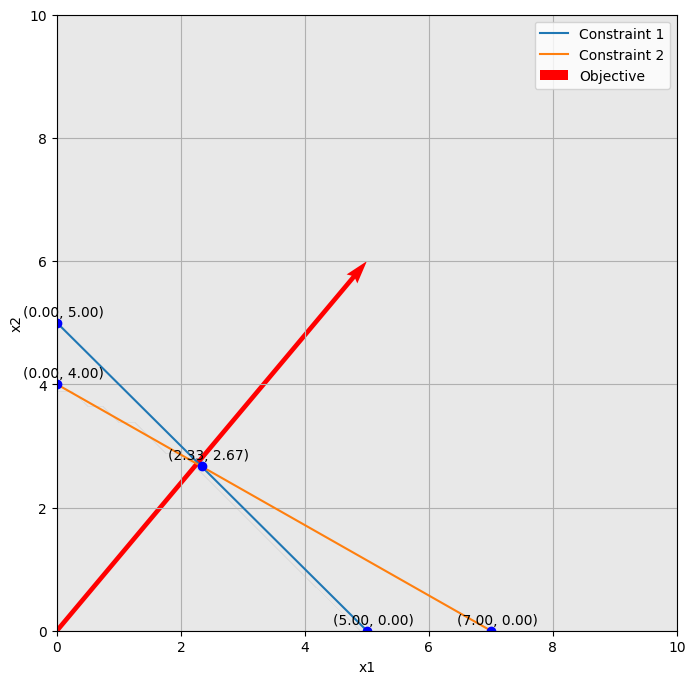

In [11]:
graphical_solver.plot()

## Branch and Bound Prep Work

In [27]:
import numpy as np
x2 = dvs[1]
x2u = np.floor(x2)
x2l = np.ceil(x2)
print(x2, x2u, x2l)

2.6666666666666665 2.0 3.0


In [13]:
linear_problem

OptimizationProblem(objective_coeffs=[5, 6],
constraint_matrix=[[1, 1], [4, 7]],
constraint_bounds=[5, 28],
variable_bounds=[(0, None), (0, None)],
variable_types=['continuous', 'continuous'])

In [28]:
branches = []
branches.append(
    linear_problem.create_branch(1,"lower", x2l)
)
branches.append(
    linear_problem.create_branch(1,"upper", x2u)
)
branches

[OptimizationProblem(objective_coeffs=[5, 6],
 constraint_matrix=[[1, 1], [4, 7]],
 constraint_bounds=[5, 28],
 variable_bounds=[(0, None), (np.float64(3.0), None)],
 variable_types=['continuous', 'continuous']),
 OptimizationProblem(objective_coeffs=[5, 6],
 constraint_matrix=[[1, 1], [4, 7]],
 constraint_bounds=[5, 28],
 variable_bounds=[(0, None), (0, np.float64(2.0))],
 variable_types=['continuous', 'continuous'])]